In [24]:
#Libraries Inports
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mp

In [ ]:
#Loading Data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load data from CSV files stored in Google Drive
df = pd.read_csv(r'/content/drive/MyDrive/CI Assignment/train.csv')
test = pd.read_csv(r'/content/drive/MyDrive/CI Assignment/test.csv')

In [ ]:
#provides the number of rows and columns in the DataFrame.
df.shape

(11504798, 12)

Data Preprocessing

In [ ]:
 #Detect missing values (NaN) in a DataFrame and then sum up the total number of missing values for each column.
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [ ]:
#check for missing values in each column of the DataFrame
test.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [ ]:
#Display the first few rows of a DataFrame.
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [ ]:
#Display the first 5 rows of the DataFrame
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [ ]:
#Find the number of duplicate rows in a DataFrame.
df.duplicated().sum()

0

In [ ]:
#Chech duplicate rows and return the total number of duplicates.
test.duplicated().sum()

0

In [ ]:
#view or refer to the DataFrame
df

In [ ]:
#Describe the daraframe
df.describe()

In [ ]:
#separating your DataFrame into two different DataFrames
numerical_var = df[['Age','Driving_License','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage','Response']]

categorical_var = df[['Gender','Vehicle_Age','Vehicle_Damage']]

In [ ]:
#Create histograms for each numerical variable in the numerical_var DataFrame.
plt.figure(figsize=(10,15))
plotnumber=1
for i in numerical_var:
    if plotnumber<=7:
        plt.subplot(4,2,plotnumber)
        sb.histplot(x=numerical_var[i])
        plt.title(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [13]:
#identify and print outliers in each numerical column of a DataFrame

#Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

#Loop through each numerical column
for col in numerical_cols:

#Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

#Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

#Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

#Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

#Print the number of outliers in the column
    print(f'Number of outliers in {col}: {outliers.shape[0]}')


    if not outliers.empty:
        print(outliers[[col]])

Number of outliers in id: 0
Number of outliers in Age: 0
Number of outliers in Driving_License: 22757
          Driving_License
471                     0
605                     0
640                     0
1463                    0
1520                    0
...                   ...
11502248                0
11502678                0
11502804                0
11503538                0
11504025                0

[22757 rows x 1 columns]
Number of outliers in Region_Code: 0
Number of outliers in Previously_Insured: 0
Number of outliers in Annual_Premium: 2377273
          Annual_Premium
0                65101.0
3                 2630.0
9                 2630.0
11                2630.0
15               66887.0
...                  ...
11504773          2630.0
11504774         71812.0
11504788          2630.0
11504791          2630.0
11504795          2630.0

[2377273 rows x 1 columns]
Number of outliers in Policy_Sales_Channel: 0
Number of outliers in Vintage: 0
Number of outliers in Resp

In [14]:
#create a variety of plots and visualizations
import matplotlib.pyplot as plt

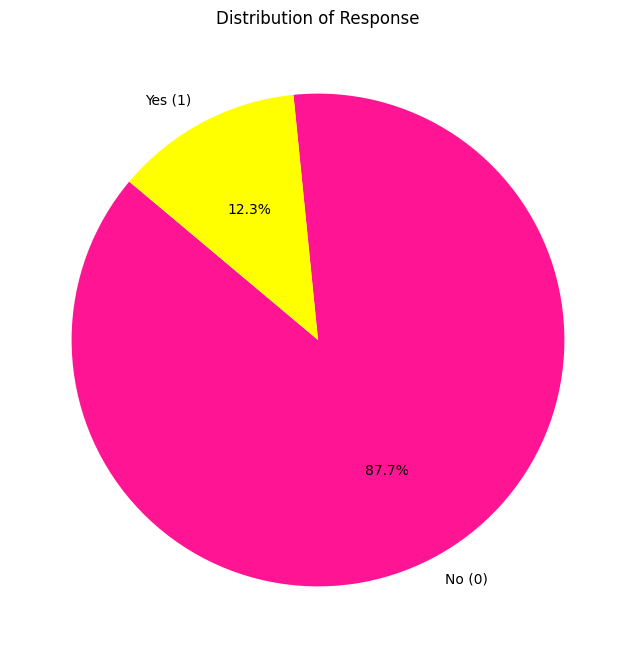

In [21]:
#create a pie chart for Distribution of Response
response_counts = df['Response'].value_counts()
labels = ['No (0)', 'Yes (1)']
colors = ['#FF1493','#FFFF00']
plt.figure(figsize=(8, 8))
plt.pie(response_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Response')
plt.show()

<ipython-input-19-1a0d619e5ff7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x="Response", data=df, palette=palette)


Text(0.5, 1.0, 'Response Distribution')

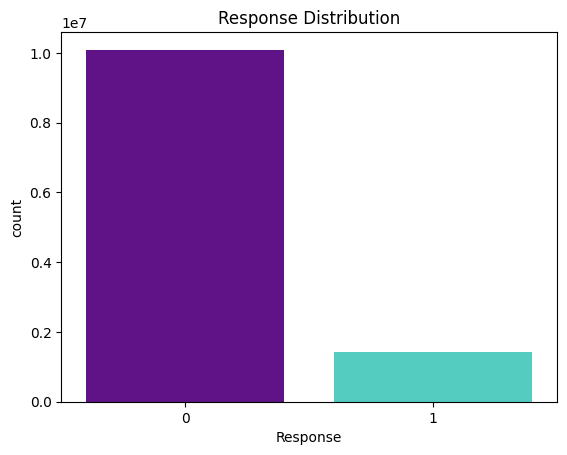

In [19]:
#create a bar chart for Distribution of Response
palette = sb.color_palette("viridis", as_cmap=True)
palette = ["#660099", "#40E0D0"]
labels = ['No (0)', 'Yes (1)']
sb.countplot(x="Response", data=df, palette=palette)
plt.title("Response Distribution")

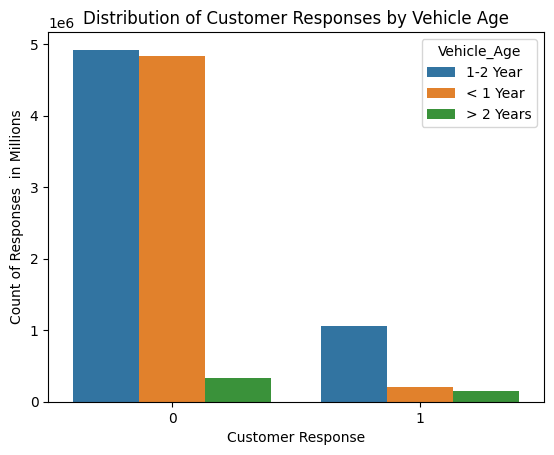

In [20]:
#Create a bar chart for Distribution of Customer Responses by Vehicle Age
sb.countplot(hue='Vehicle_Age', x='Response', data=df)
plt.xlabel('Customer Response')
plt.ylabel('Count of Responses  in Millions')
plt.title('Distribution of Customer Responses by Vehicle Age')
plt.show()

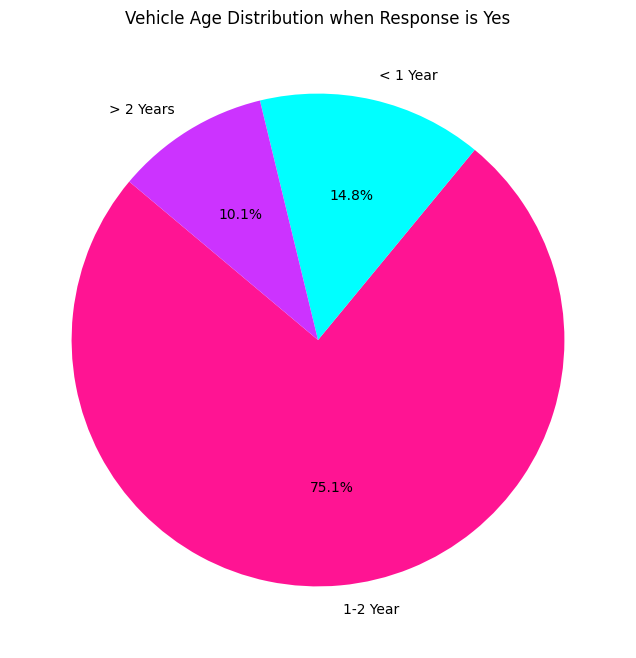

In [29]:
#Create a pie chart for Vehicle Age Distribution when Response is Yes
response_1_data = df[df['Response'] == 1]
vehicle_age_counts = response_1_data['Vehicle_Age'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(vehicle_age_counts, labels=vehicle_age_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF1493', '#00FFFF', '#CC33FF'])
plt.title('Vehicle Age Distribution when Response is Yes')
plt.show()

<Axes: title={'center': 'Distribution of Vehicale Damage'}, xlabel='Vehicle Damage', ylabel='Count of Responses in Millions'>

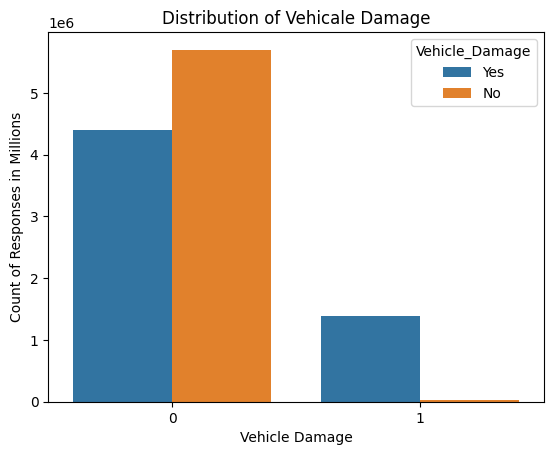

In [30]:
#Create a bar chart for Distribution of Vehicale Damage
plt.xlabel('Vehicle Damage')
plt.ylabel('Count of Responses in Millions')
plt.title('Distribution of Vehicale Damage')
sb.countplot(hue='Vehicle_Damage', x='Response', data=df)

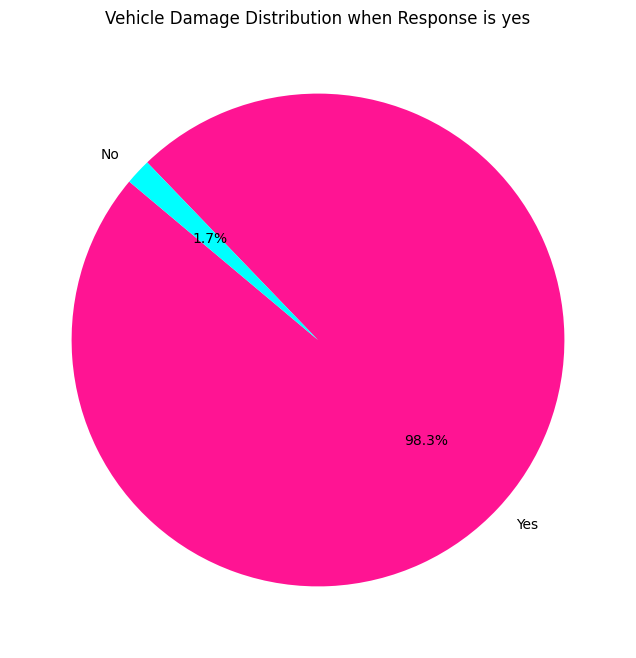

In [35]:
#Create a pie chart for Vehicle Damage Distribution when Response is yes
response_1_data = df[df['Response'] == 1]
vehicle_damage_counts = response_1_data['Vehicle_Damage'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(vehicle_damage_counts, labels=vehicle_damage_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF1493', '#00FFFF', '#CC33FF'])
plt.title('Vehicle Damage Distribution when Response is yes')
plt.show()

<Axes: title={'center': 'Distribution Previously Insured or Previously not Insured Customers'}, xlabel='Previously Insured', ylabel='Count of Responses in Millions'>

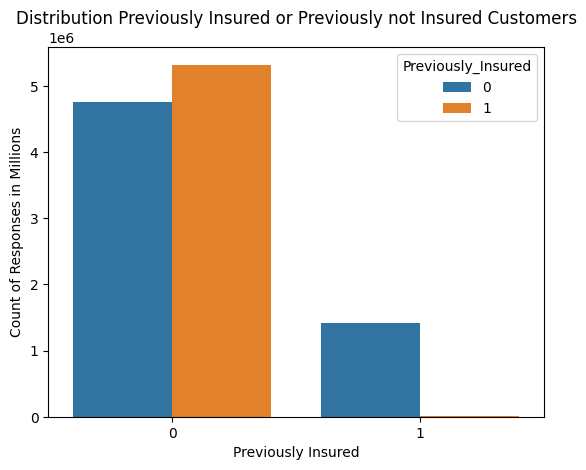

In [32]:
#Create a bar chart for Distribution Previously Insured or Previously not Insured Customers
plt.xlabel('Previously Insured')
plt.ylabel('Count of Responses in Millions')
plt.title('Distribution Previously Insured or Previously not Insured Customers')
sb.countplot(hue='Previously_Insured', x='Response', data=df)

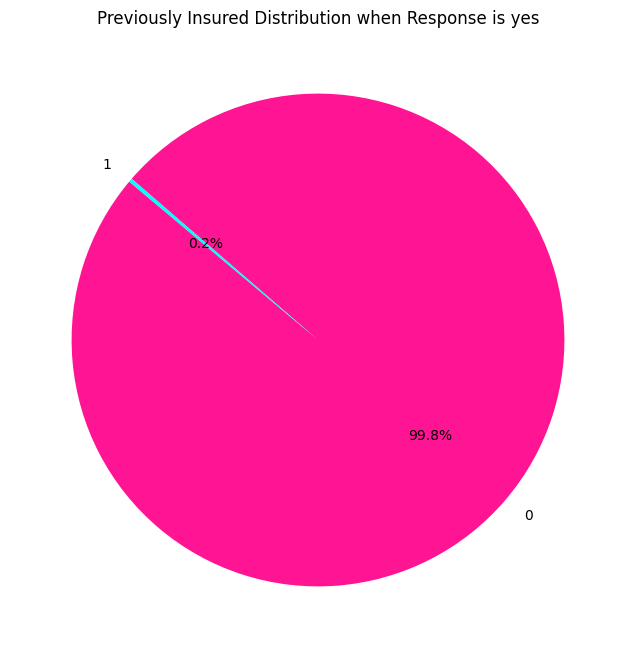

In [33]:
#Create a pie chart for Previously Insured Distribution when Response is yes
response_1_data = df[df['Response'] == 1]
Previously_Insured_counts = response_1_data['Previously_Insured'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Previously_Insured_counts, labels=Previously_Insured_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF1493', '#00FFFF', '#CC33FF'])
plt.title('Previously Insured Distribution when Response is yes')
plt.show()

<Axes: title={'center': 'Distribution of Male and Female'}, xlabel='Gender', ylabel='Count of Responses in Millions'>

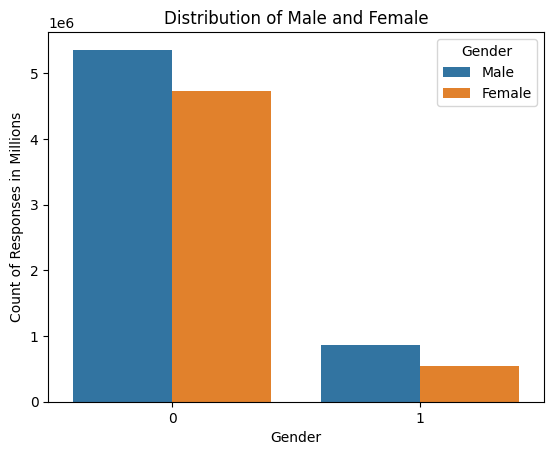

In [36]:
#Distribution of Male and Female
plt.xlabel('Gender')
plt.ylabel('Count of Responses in Millions')
plt.title('Distribution of Male and Female')
sb.countplot(hue='Gender', x='Response', data=df)

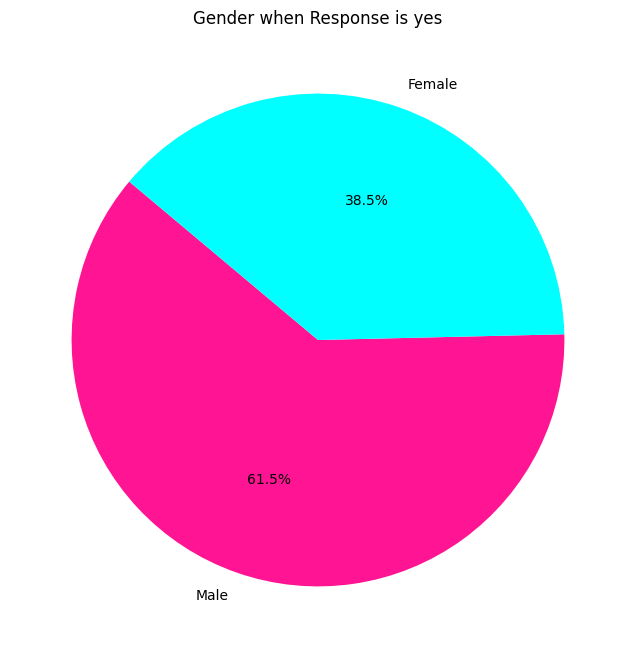

In [37]:
#Create a pie chart for Gender when Response is yes
response_1_data = df[df['Response'] == 1]
Previously_Insured_counts = response_1_data['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Previously_Insured_counts, labels=Previously_Insured_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF1493', '#00FFFF', '#CC33FF'])
plt.title('Gender when Response is yes')
plt.show()

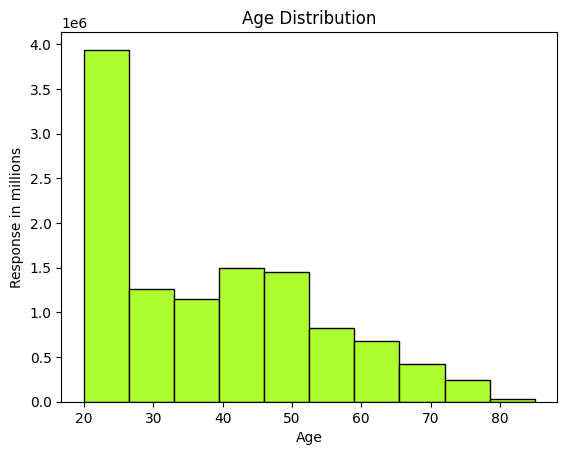

In [39]:
#Create a bar chart for Age Distribution
plt.hist(df['Age'], color='GreenYellow', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Response in millions')
plt.show()

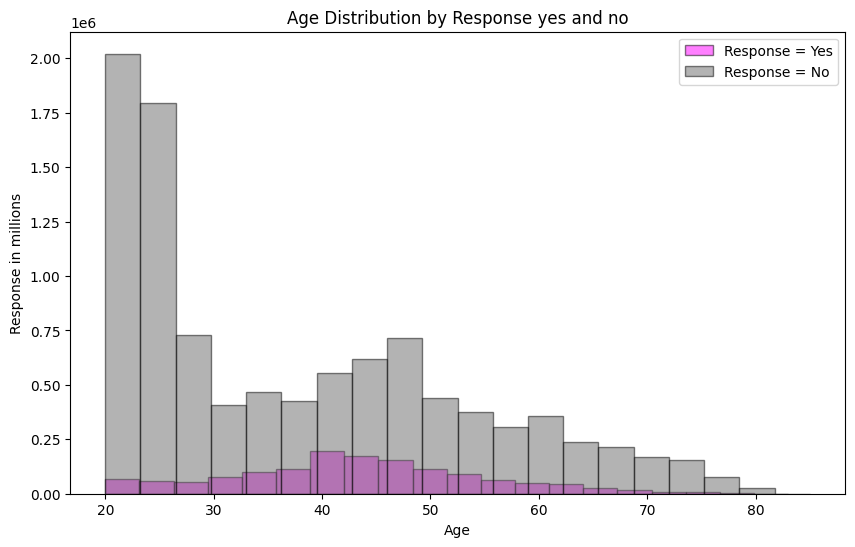

In [42]:
#Create a bar chart for Age Distribution by Response yes and no
yes_response = df[df['Response'] == 1]
no_response = df[df['Response'] == 0]
plt.figure(figsize=(10, 6))
plt.hist(yes_response['Age'], bins=20, color='Magenta', edgecolor='black', alpha=0.5, label='Response = Yes')
plt.hist(no_response['Age'], bins=20, color='DimGray', edgecolor='black', alpha=0.5, label='Response = No')
plt.title('Age Distribution by Response yes and no')
plt.xlabel('Age')
plt.ylabel('Response in millions')
plt.legend()
plt.show()

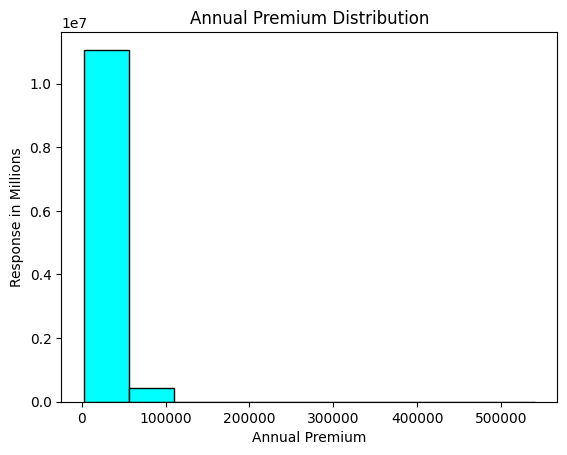

In [43]:
#Create a bar chart for Annual Premium Distribution
plt.hist(df['Annual_Premium'], color='Aqua', edgecolor='black')
plt.title('Annual Premium Distribution')
plt.xlabel('Annual Premium')
plt.ylabel('Response in Millions')
plt.show()

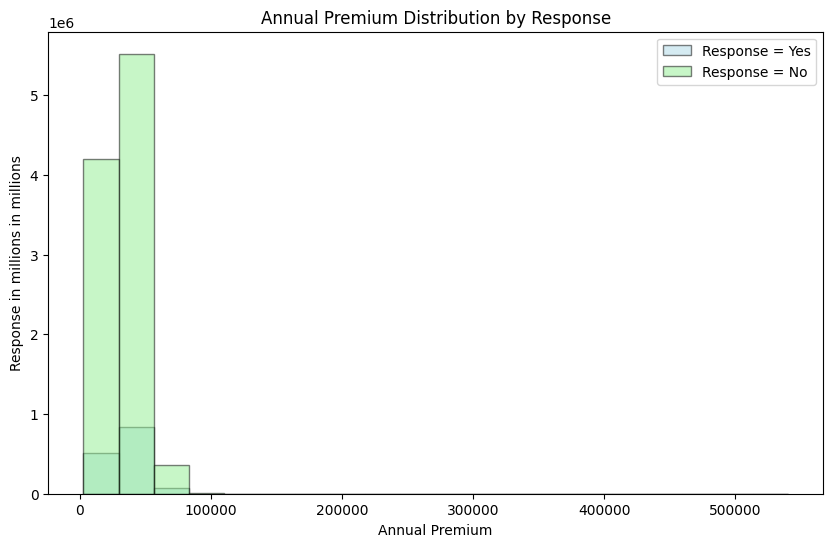

In [44]:
#Create a bar chart for Annual Premium Distribution by Response
yes_response = df[df['Response'] == 1]
no_response = df[df['Response'] == 0]
plt.figure(figsize=(10, 6))
plt.hist(yes_response['Annual_Premium'], bins=20, color='lightblue', edgecolor='black', alpha=0.5, label='Response = Yes')
plt.hist(no_response['Annual_Premium'], bins=20, color='lightgreen', edgecolor='black', alpha=0.5, label='Response = No')
plt.title('Annual Premium Distribution by Response')
plt.xlabel('Annual Premium')
plt.ylabel('Response in millions in millions')
plt.legend()
plt.show()

In [ ]:
#view the columns in the DataFrame
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
#defined is designed to convert categorical string values in specific columns of a DataFrame to integer values
def words_to_int(df):

#Mapping 'Vehicle_Damage'
    df['Vehicle_Damage']=df['Vehicle_Damage'].map({'Yes':1,'No':0})

#Mapping 'Gender'
    df['Gender']=df['Gender'].map({'Male':1,'Female':0})

#Mapping 'Vehicle_Age'
    df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year':1, '1-2 Year':2,'> 2 Years':3})
    return df
df = words_to_int(df)
test = words_to_int(test)

In [ ]:
#view or refer to the DataFrame
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,21,1,35.0,0,2,1,65101.0,124.0,187,0
1,1,1,43,1,28.0,0,3,1,58911.0,26.0,288,1
2,2,0,25,1,14.0,1,1,0,38043.0,152.0,254,0
3,3,0,35,1,1.0,0,2,1,2630.0,156.0,76,0
4,4,0,36,1,15.0,1,2,0,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,1,48,1,6.0,0,2,1,27412.0,26.0,218,0
11504794,11504794,0,26,1,36.0,0,1,1,29509.0,152.0,115,1
11504795,11504795,0,29,1,32.0,1,1,0,2630.0,152.0,189,0
11504796,11504796,0,51,1,28.0,0,2,1,48443.0,26.0,274,1


In [ ]:
#Remove a column named id from the DataFrame
df = df.drop(['id'], axis=1)

In [ ]:
#view or refer to the DataFrame
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,21,1,35.0,0,2,1,65101.0,124.0,187,0
1,1,43,1,28.0,0,3,1,58911.0,26.0,288,1
2,0,25,1,14.0,1,1,0,38043.0,152.0,254,0
3,0,35,1,1.0,0,2,1,2630.0,156.0,76,0
4,0,36,1,15.0,1,2,0,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...
11504793,1,48,1,6.0,0,2,1,27412.0,26.0,218,0
11504794,0,26,1,36.0,0,1,1,29509.0,152.0,115,1
11504795,0,29,1,32.0,1,1,0,2630.0,152.0,189,0
11504796,0,51,1,28.0,0,2,1,48443.0,26.0,274,1


In [ ]:
#calculates the correlation matrix for the DataFrame
correlation_matrix = df.corr()

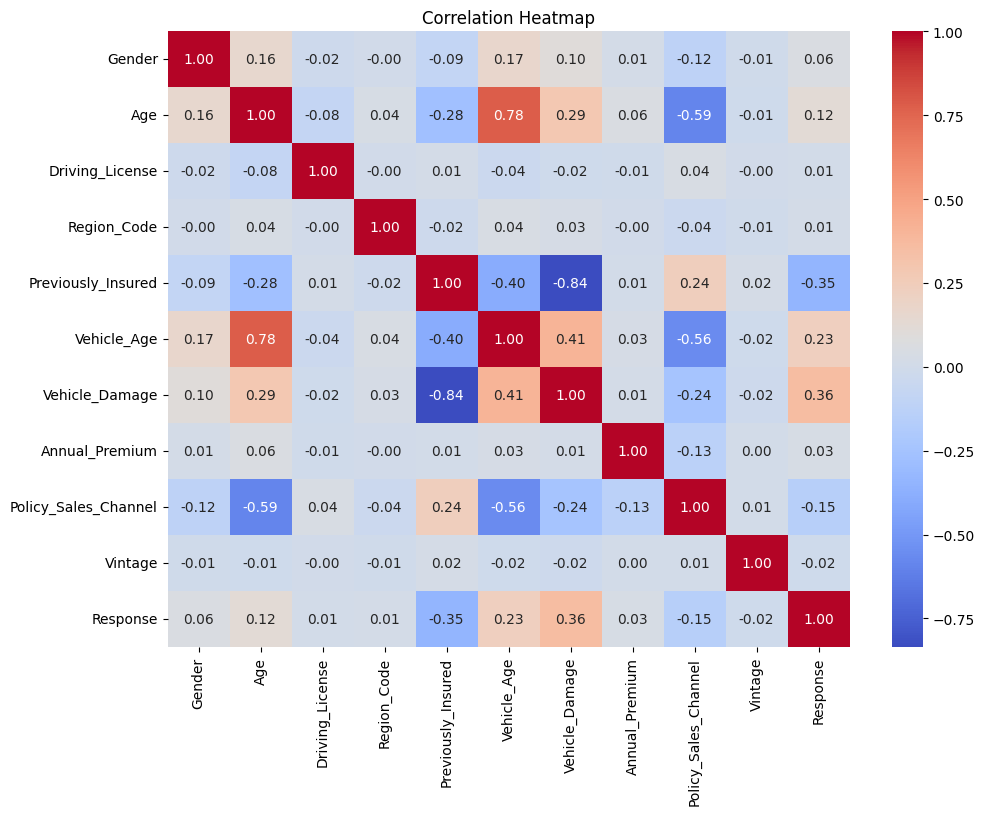

In [ ]:
#create a heatmap of the correlation matrix
plt.figure(figsize=(11, 8))
sb .heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Imports the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(['Response'], axis=1)
y = df['Response']
x_kaggle_test = test.drop(['id'], axis=1)

In [ ]:
x.shape

(11504798, 10)

In [ ]:
x.shape

(11504798, 10)

In [ ]:
x_kaggle_test.shape

(7669866, 10)

In [ ]:
x_kaggle_test.shape

(7669866, 10)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
train_data = pd.concat([x_train, y_train], axis=1)

In [ ]:
minority_class = train_data[train_data['Response'] == 1]
majority_class = train_data[train_data['Response'] == 0]

In [ ]:
n_sam = len(majority_class) // 2

majority_class_undersampled = majority_class.sample(n_sam, random_state=42)
undersampled_df = pd.concat([minority_class, majority_class_undersampled])

X = undersampled_df.drop(['Response'] , axis = 1)
y = undersampled_df['Response']

X_train ,X_test , y_train, y_test = train_test_split(X, y, test_size = 0.25 , random_state = 42)

print('Train Size : ')
print('X :', X_train.shape , '\ny :' , y_train.shape, '\n\n')
print('Test Size : ')
print('X :', X_test.shape , '\ny :' , y_test.shape)

Train Size : 
X : (3875892, 10) 
y : (3875892,) 


Test Size : 
X : (1291964, 10) 
y : (1291964,)


In [ ]:
!pip install imblearn

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
X = [[1, 2], [2, 3], [3, 4], [4, 5]]
y = [0, 1, 0, 1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_sm = X_train  # In your actual scenario, this could be oversampled data
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train_sm)
X_train_sm = min_max_scaler.transform(X_train_sm)

In [ ]:
print(X_train_sm)

[[1.         1.        ]
 [0.         0.        ]
 [0.66666667 0.66666667]]


In [ ]:
# Output should be a list of lists with commas separating the elements
print([[0.0, 0.0], [1.0, 1.0], [0.5, 0.5]])

[[0.0, 0.0], [1.0, 1.0], [0.5, 0.5]]


In [ ]:
# Correct format
output = [[0.0, 0.0], [1.0, 1.0], [0.5, 0.5]]
print(output)

[[0.0, 0.0], [1.0, 1.0], [0.5, 0.5]]


In [ ]:
X_train_sm.shape

(3, 2)

In [ ]:
#x_test.shape

In [ ]:
import numpy as np

# Assuming y_train is currently a list
y_train = [0, 1, 0, 1]

# Convert the list to a NumPy array
y_train = np.array(y_train)

# Now you can access the shape attribute
print(y_train.shape)

(4,)


In [ ]:
X_train = np.array(X_train)  # Convert the list of lists to a NumPy array
print(X_train.shape)  # Now this will work and return the shape of X_train

(3, 2)


In [ ]:
#y_test.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Example data
X = [[1, 2], [2, 3], [3, 4], [4, 5]]
y = [0, 1, 0, 1]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have used SMOTE or any other technique to oversample your data,
# you might have defined `X_train_sm` here.
# X_train_sm = SMOTE().fit_resample(X_train, y_train)  # Example of using SMOTE

# For demonstration, let's use X_train directly
X_train_sm = X_train

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the data
min_max_scaler.fit(X_train_sm)
X_train_sm = min_max_scaler.transform(X_train_sm)

print(X_train_sm)

[[1.         1.        ]
 [0.         0.        ]
 [0.66666667 0.66666667]]


In [ ]:
#std_scaler = StandardScaler()
#x_train = std_scaler.fit_transform(x_train)
#x_test = std_scaler.transform(x_test)

In [ ]:
#x_train

In [ ]:
#x_test

Model training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def check_test_accuracy(y_test, pred):
    # Indent the code within the function
    print("Accuracy : {:.2f}%". format (accuracy_score(y_test, pred) *100))
    print("Precision: {:.2f}%".format(precision_score(y_test, pred) * 100))
    print("Recall: {:.2f}%".format(recall_score(y_test, pred) * 100))
    print("F1: {:.2f}%".format(f1_score(y_test, pred) * 100))
    print("==========================")


LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

check_test_accuracy(y_train, train_pred)

ValueError: Found input variables with inconsistent numbers of samples: [9203838, 3]

Multinomial naive Base

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train_sm, y_train_sm)

train_pred = mnb.predict(X_train_sm)
test_pred = mnb.predict(X_test_sm)

print("==Training Accuracy==")
check_test_accuracy(y_train_sm, train_pred)
print("==Testing Accuracy==")
check_test_accuracy(y_test_sm, test_pred)

Decision Tree

In [ ]:
bdt = DecisionTreeClassifier()
bdt.fit(X_train_sm, y_train_sm)

train_pred = bdt.predict(X_train_sm)
test_pred = bdt.predict(X_test_sm)

print("==Training Accuracy==")
check_test_accuracy(y_train_sm, train_pred)
print("==Testing Accuracy==")
check_test_accuracy(y_test_sm, test_pred)

NameError: name 'y_train_sm' is not defined

Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)

train_pred = rf.predict(X_train_sm)
test_pred = rf.predict(X_test_sm)

print("==Training Accuracy==")
check_test_accuracy(y_train_sm, train_pred)
print("==Testing Accuracy==")
check_test_accuracy(y_test_sm, test_pred)

*Support* Vector machine

In [ ]:
svm = SVC()
svm.fit(X_train_sm, y_train_sm)

train_pred = svm.predict(X_train_sm)
test_pred = svm.predict(X_test_sm)

print("==Training Accuracy==")
check_test_accuracy(y_train_sm, train_pred)
print("==Testing Accuracy==")
check_test_accuracy(y_test, test_pred)

hyperparameters tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_sm, y_train_sm)

In [ ]:
bdt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = bdt.predict(X_test)

check_test_accuracy(y_test, y_pred)

Feature Selection

In [ ]:
#creates a DataFrame that ranks features by their importance as determined by a trained model
feature_importances = bdt.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
#create a bar plot that visualizes the importance of different features in a dataset
plt.figure(figsize=(12, 8))
sb.barplot(x='Feature', y='Importance', data=feature_importance_df, palette='coolwarm')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [ ]:
#Install the scikit-learn library
!pip install scikit-learn

 ROC Curve

In [ ]:
#defined is a custom implementation for plotting the ROC curve for a given model and dataset
def plot_roc_curve(model, x_test, y_test):
    y_pred_prob = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
#Import matplot library
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [ ]:
#plot the Receiver Operating Characteristic (ROC) curve for a binary classification model
plot_roc_curve(bdt, X_test_sm, y_test_sm)

In [ ]:
#provided reads a CSV file from a specified path into a Pandas DataFrame
yt=pd.read_csv(r'/content/drive/MyDrive/ci_dataset/sample_submission.csv')

In [ ]:
#extract and print the unique values from the Response column of a DataFrame named yt
unique_responses = yt['Response'].unique()

print("Unique Response Values:", unique_responses)

In [ ]:
yt

In [ ]:
kaggle_test_pred = bdt.predict(x_kaggle_test)


In [ ]:
#Defines a function
def words_to_int(dff):
    if dff == 0:
        return 0.5
    if dff == 1:
        return 1


test_predictionss = [words_to_int(x) for x in kaggle_test_pred]

In [ ]:
#creates a new DataFrame called 'submission'
submission = pd.DataFrame({'id': yt['id'], 'Response': test_predictionss})

In [ ]:
#Display the submission DataFrame
submission

In [ ]:
#Save a DataFrame named submission as a CSV file
submission.to_csv('/content/drive/MyDrive/ci_dataset/submission7.csv', index=False)

Software Artifact

In [ ]:
#Import pickle
import pickle
from google.colab import files

In [ ]:
#Save a trained model to a file using the pickle module
model_filename = 'insurence_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(bdt, file)

In [ ]:
#Download the model file
files.download(model_filename)

In [ ]:
#Installed version of the scikit-learn package
!pip show scikit-learn